<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/Pivots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as data
from matplotlib.pyplot import *
import datetime as dt
import pandas as pd

In [2]:
start="2020-1-1"
now=dt.datetime.now()
stock="GC=F"
df=data.DataReader(stock,"yahoo",start,now)

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1528.699951,1518.000000,1518.099976,1524.500000,214.0,1524.500000
2020-01-03,1552.699951,1530.099976,1530.099976,1549.199951,107.0,1549.199951
2020-01-06,1580.000000,1560.400024,1580.000000,1566.199951,416.0,1566.199951
2020-01-07,1576.300049,1558.300049,1558.300049,1571.800049,47.0,1571.800049
2020-01-08,1604.199951,1552.300049,1579.699951,1557.400024,236.0,1557.400024
...,...,...,...,...,...,...
2021-02-11,1845.000000,1820.900024,1840.500000,1824.900024,602.0,1824.900024
2021-02-12,1827.500000,1809.199951,1825.000000,1821.599976,602.0,1821.599976
2021-02-16,1823.400024,1787.300049,1820.900024,1797.199951,1141.0,1797.199951


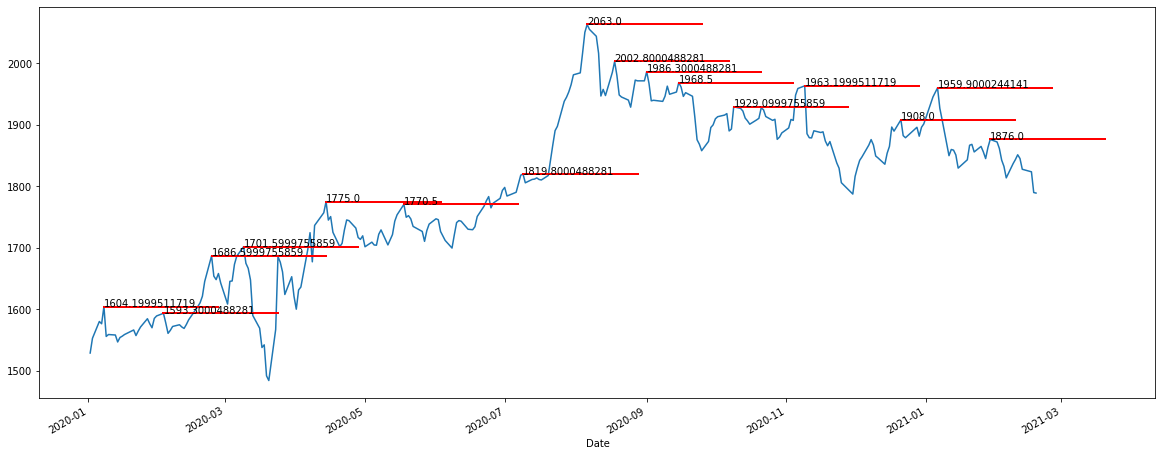

In [7]:
pivots=[]#how many days----
dates=[]
counter=0
lastPivot=0

Range=np.zeros(20).tolist()
dateRange=np.zeros(20).tolist()

for i in df.index:
  currentMax=max(Range,default=0)
  value=round(df.High[i],10)
  Range=Range[1:29]
  Range.append(value)
  dateRange=dateRange[1:29]
  dateRange.append(i)
  if currentMax==max(Range,default=0):
    counter+=1
  else:
    counter=0
  if counter==4:
    lastPivot=currentMax    
    dateloc=Range.index(lastPivot)    
    lastDate=dateRange[dateloc]    
    pivots.append(lastPivot)
    dates.append(lastDate)
df.High.plot(figsize=(20,8))
timeD=dt.timedelta(days=50)
for index in range(len(pivots)):
  # print(str(pivots[index])+": "+str(dates[index]))
  plot_date([dates[index],dates[index]+timeD],
            [pivots[index],pivots[index]],
            linestyle="-",linewidth=2,marker=",",color="red")
  text(dates[index],pivots[index],pivots[index])

In [ ]:


dates






[45.55,
 47.09,
 46.9,
 49.69,
 48.8,
 64.86,
 72.17,
 116.4,
 169.2,
 182.4,
 105.16,
 153.11,
 154.55,
 165.2,
 203.79,
 318.0,
 293.0,
 479.04,
 457.79,
 439.13]